## Download data  

In [ ]:
!gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:01<00:00, 45.6MB/s]


## Giải nén data

In [ ]:
!unzip -q "/content/FER-2013.zip"

## Load và xử lý data dạng ảnh 

### Cách xử lý data dùng image_dataset_from_directory

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
tf.keras.utils.set_random_seed(1)
tf.config.experimental.enable_op_determinism()

In [ ]:
batch_size = 256
img_height = 48
img_width = 48
train_dir = "/content/train" 
test_dir = "/content/test"   

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


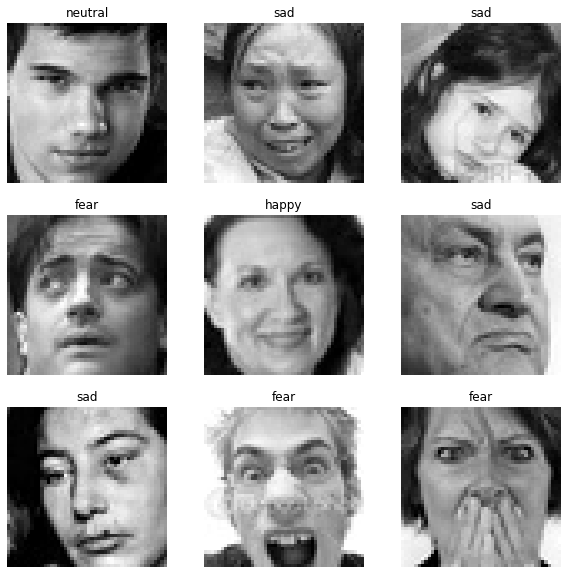

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(images[i].numpy()).astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
normalized_train_ds = train_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))
normalized_val_ds = val_ds.map(lambda x, y: (tf.subtract(tf.divide(x, 127.5),1), y))

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalized_train_ds = normalized_train_ds.cache().shuffle(buffer_size=512).prefetch(buffer_size=AUTOTUNE)
normalized_val_ds = normalized_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Sử dụng Tensorflow để  build, compile và train và evaluate model. Kết quả train và evaluation được thể hiện bằng hình ảnh bằng cách sử dụng matplotlib 

##### Softmax Regression Norm

In [ ]:
num_class = 7

#
FER_SRN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(48,48,1)),
    tf.keras.layers.Dense(units=num_class)
])
FER_SRN_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
opt = tf.keras.optimizers.SGD(learning_rate=0.006)

FER_SRN_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
FER_SRN_history = FER_SRN_model.fit(normalized_train_ds, validation_data=normalized_val_ds, epochs=100)

# Epoch 100/100
# 90/90 [==============================] - 0s 4ms/step - loss: 1.5470 - accuracy: 0.4105 - val_loss: 1.6447 - val_accuracy: 0.3714

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 7)                 16135     
                                                                 
Total params: 16,135
Trainable params: 16,135
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
90/90 [==============================] - 12s 19ms/step - loss: 1.8840 - accuracy: 0.2382 - val_loss: 1.8316 - val_accuracy: 0.2554
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 1.7952 - accuracy: 0.2879 - val_loss: 1.7839 - val_accuracy: 0.2921
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 1.7571 - accuracy: 0.3096 - val_loss: 1.7570 - val_accuracy: 0.3109
Epoch 4/100
90/90 [====

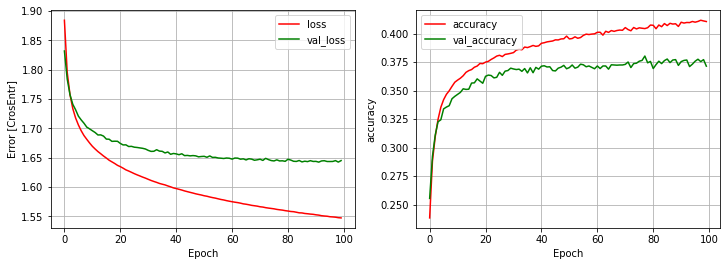

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='red')
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


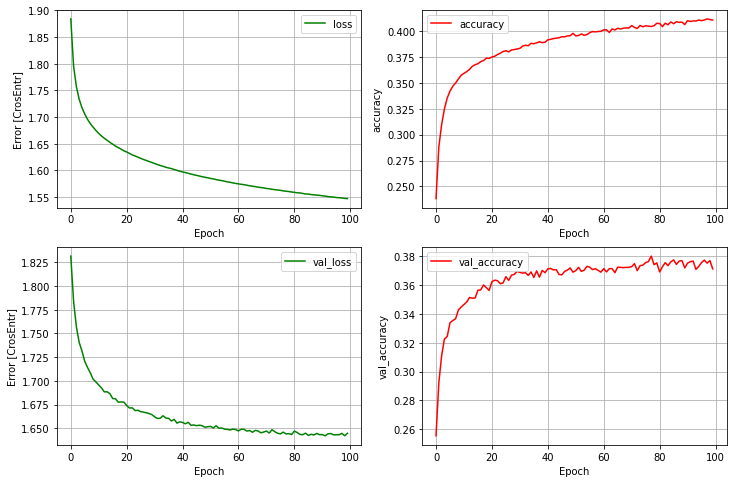

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(FER_SRN_history.history)
hist['epoch'] = FER_SRN_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
95,1.549048,0.409962,1.643165,0.375719,95
96,1.548686,0.410615,1.643262,0.377460,96
97,1.548254,0.411660,1.644676,0.375370,97
98,1.547422,0.411050,1.642190,0.377112,98
99,1.547015,0.410528,1.644736,0.371364,99


In [ ]:
print("Max train acc: ", max(hist['accuracy']))
print("Max val acc: ", max(hist['val_accuracy']))

print("Min train loss: ", min(hist['loss']))
print("Min val loss: ", min(hist['val_loss']))

Max train acc:  0.41165968775749207
Max val acc:  0.3802473545074463
Min train loss:  1.5470153093338013
Min val loss:  1.6421092748641968
